# Austin Waste and Diversion Data Analysis

## Working Area

### Dataset
Extracting the data from BigQuery using the following commands *:
<br>
`SELECT report_date, load_time, load_type, load_weight, dropoff_site`
<br>
`FROM bigquery-public-data.austin_waste.waste_and_diversion`
<br>
`WHERE report_date BETWEEN '2021-01-01' AND '2021-07-09'`
<br>

The command given prior will give the data from column report_date, load_time, load_type, load_weight, and dropoff_site.
<br>
Download the data as csv and save it as h8dsft_P0GC2_rivaldo_jasper.
<br>
(*) Remove the `<br>` if you are copying the command from Editor Mode

In [203]:
# Importing Libraries and give them an alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
from scipy.stats import norm

In [117]:
# Importing data that has been extracted from BigQuery as dataframe using Pandas
df = pd.read_csv('Austin_Waste_and_Diversion_Data_Analysis.csv')

In [118]:
# Showing the top 5 rows from the dataset
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00.000000 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00.000000 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00.000000 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00.000000 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00.000000 UTC,TIRES,1400.0,MRF


In [119]:
# Showing the bottom 5 rows from the dataset
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00.000000 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00.000000 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00.000000 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00.000000 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00.000000 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


### Problem 1
#### 1. Data Cleaning

In [120]:
# Remove the duplicate data from dataframe
df.drop_duplicates()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00.000000 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00.000000 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00.000000 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00.000000 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00.000000 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00.000000 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00.000000 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00.000000 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00.000000 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


In [121]:
# Checking the data type of dataframe
df.dtypes

report_date      object
load_time        object
load_type        object
load_weight     float64
dropoff_site     object
dtype: object

In [122]:
# Converting report_date and load_time format from 'string' to 'datetime' format
df['report_date'] = pd.to_datetime(df['report_date'])
df['load_time'] = pd.to_datetime(df['load_time'])

In [123]:
# Checking the total number of null cell in every column
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

load_weight column skewness value = 3.335938213321684


<AxesSubplot:>

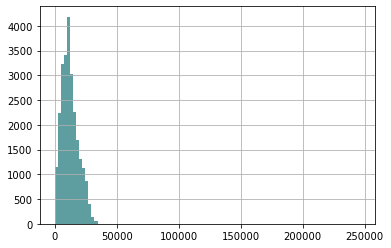

In [124]:
# As result of null counts, 'load_weight' is the only column that contain the null values
# Therefore, we only need to manipulate the values of 'load_weight' column
# Checking the data skewness of 'load_weight' column
print('load_weight column skewness value =', df['load_weight'].skew())
df['load_weight'].hist(bins = 100, color = 'cadetblue')

`The 'load_weight' column value of skewness is over than 1`
<br>
`Which indicates the 'load_weight' column is suffering from extreme right skew`
<br>
`Therefore, median value were used to fill the null values of cell of the corresponding column`

In [125]:
# Subtitute the null values in 'load_weight' column with their median 
df['load_weight'] = df['load_weight'].fillna(df['load_weight'].median())

#### 2. Data Exploration

In [126]:
# Show Site that has the highest traffic level
print(df.pivot_table(columns=['dropoff_site'], aggfunc='size').sort_values(ascending = False))

dropoff_site
TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
ST. EDWARDS                  1
STEINER LANDFILL             1
BALCONES WOODS               1
WESTFIELD                    1
WILCAB                       1
dtype: int64


In [127]:
# Show the dropoff site that has the highest load weight
df.groupby(df['dropoff_site']).sum().sort_values('load_weight' ,ascending = False)

,load_weight
dropoff_site,
TDS LANDFILL,1.622100e+08
ORGANICS BY GOSH,6.800811e+07
BALCONES RECYCLING,3.631587e+07
TDS - MRF,2.910428e+07
HORNSBY BEND,1.098442e+07
ONION CREEK,9.186900e+06
ON ROUTE HIGH DUMP,9.238800e+05
PARK CENTER,8.475000e+05
GREAT NORTHERN,8.381200e+05


In [128]:
# Show the most frequent load type
print(df.pivot_table(columns=['load_type'], aggfunc='size').sort_values(ascending = False))

load_type
GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED ORGANICS           1
CONTAMINATED RECYCLING          1
dtype: int64


`Explore the top 3 dropoff_site traffic and/or capacity furthermore`

In [129]:
# Making dataframe for every dropoff_site
df_tds = df[df.dropoff_site == 'TDS LANDFILL'].reset_index()
df_obg = df[df.dropoff_site == 'ORGANICS BY GOSH'].reset_index()
df_br = df[df.dropoff_site == 'BALCONES RECYCLING'].reset_index()

In [130]:
# Making function for maximum, minimum, range, skewness value, and central tendency
def CentralTend(data):
    print('Maximum =', data.load_weight.max())
    print('Minimum =', data.load_weight.min())
    print('Range =', data.load_weight.max() - data.load_weight.min())
    print('Skewness Value =', data.load_weight.skew())
    print('Mean =', data.load_weight.mean())
    print('Median =', data.load_weight.median())
    print('Mode =', data.load_weight.mode())  

In [131]:
print('TDS LANDFILL Central Tendencies')
CentralTend(df_tds)

print('')

print('ORGANICS BY GOSH Central Tendencies')
CentralTend(df_obg)

print('')

print('BALCONES RECYCLING Central Tendencies')
CentralTend(df_br)

TDS LANDFILL Central Tendencies
Maximum = 245540.0
Minimum = 0.0
Range = 245540.0
Skewness Value = 3.695442376110943
Mean = 15168.321726145501
Median = 14920.0
Mode = 0       20.0
1       60.0
2    12020.0
Name: load_weight, dtype: float64

ORGANICS BY GOSH Central Tendencies
Maximum = 29660.0
Minimum = 20.0
Range = 29640.0
Skewness Value = 0.05937529539509636
Mean = 11817.220851433536
Median = 11900.0
Mode = 0    11300.0
Name: load_weight, dtype: float64

BALCONES RECYCLING Central Tendencies
Maximum = 25780.0
Minimum = 140.0
Range = 25640.0
Skewness Value = 0.10148179348246143
Mean = 9464.652071931196
Median = 9840.0
Mode = 0    11880.0
Name: load_weight, dtype: float64


`From a brief data exploration, we can conclude that:`
- TDS LANDFILL turns out to be the dropoff_site with the highest traffic and the largest capacity (based on total of load_weight)
- The top 5 highest traffic dropoff_site also has the same rank for their capacity (based on total of load_weight)
- GARBAGE COLLECTIONS is the most frequent type of load

#### 3. Central Tendencies Result
`As the result of calculating the central tendencies from the top 3 dropoff_site with the highest traffic and/or capacity:`
- TDS LANDFILL has value of skewness above than 1 and mode value that far below than mean and median indicates that the load_weight distribution is leaning towards the minimum value / left side (extreme right skew). Which means, even though TDS LANDFILL has the highest traffic yet capacity but most of the load_weight is relatively small / near to the minimum value. This dropoff_site also has an extremely high value for its load_weight ever recorded.
- ORGANICS BY GOSH turns out has value of skewness nearly equal to 0, and very similar mean, median, and mode value. Which indicates that the load_weight distribution has a normal distribution pattern, we can conclude that ORGANICS BY GOSH has an IDEAL value of load_weight by far.
- BALCONES RECYCLING has the same result as ORGANICS BY GOSH although it can't be called as THE MOST IDEAL.

### 4. Choose the most interesting dropoff_site
`Base on data exploration, TDS LANDFILL is the most interesting dropoff_site. It is because of their condition and their data distribution that has mentioned before.`

### 5. Data Outliers
`Because the TDS LANDFILL is suffering from extreme skew, therefore Inter-Quartile Range with extreme value analysis will be performed`

In [132]:
# Calculate the quantile 1st and 3rd (Q1 and Q3) in order to obtain IQR values for outliers limitation
Q1 = df_tds['load_weight'].quantile(0.25)
Q3 = df_tds['load_weight'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 3*IQR
upper_limit = Q3 + 3*IQR

In [133]:
# Display the data that consider as outliers
df_tds[(df_tds.load_weight > upper_limit) | (df_tds.load_weight<lower_limit)] 

,index,report_date,load_time,load_type,load_weight,dropoff_site
857,2381,2021-03-09,2021-03-09 01:30:00+00:00,GARBAGE COLLECTIONS,145160.0,TDS LANDFILL
5108,13632,2021-05-26,2021-05-26 11:40:00+00:00,GARBAGE COLLECTIONS,80697.0,TDS LANDFILL
5187,13817,2021-05-27,2021-05-27 11:33:00+00:00,GARBAGE COLLECTIONS,245540.0,TDS LANDFILL
6561,16964,2021-06-21,2021-06-21 01:05:00+00:00,GARBAGE COLLECTIONS,227780.0,TDS LANDFILL
9877,24239,2021-02-09,2021-02-09 01:08:00+00:00,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL


In [134]:
# Making variables for total number of data and total number of data that considered as outliers data
sum_tds = len(df_tds.index)
sum_tds_out = len(df_tds[(df_tds.load_weight > upper_limit) | (df_tds.load_weight<lower_limit)].index)
print('Total number of data =', sum_tds)
print('Total number of outliers data =', sum_tds_out)
print( sum_tds_out/sum_tds * 100 , '% of TDS LANDFILL data is consider as outliers')

Total number of data = 10694
Total number of outliers data = 5
0.046755189826070694 % of TDS LANDFILL data is consider as outliers


In [135]:
# Making new dataframe that contain no outliers
df_tds_no = df_tds[~(df_tds.load_weight < lower_limit) & ~(df_tds.load_weight > upper_limit)]


In [136]:
# Central Tendencies Comparison of Before and After Outliers Filtering
print('Before Filtering')
CentralTend(df_tds)

print('')

print('After Filtering')
CentralTend(df_tds_no)

Before Filtering
Maximum = 245540.0
Minimum = 0.0
Range = 245540.0
Skewness Value = 3.695442376110943
Mean = 15168.321726145501
Median = 14920.0
Mode = 0       20.0
1       60.0
2    12020.0
Name: load_weight, dtype: float64

After Filtering
Maximum = 58600.0
Minimum = 0.0
Range = 58600.0
Skewness Value = 0.03689458913684588
Mean = 15100.399994330619
Median = 14920.0
Mode = 0       20.0
1       60.0
2    12020.0
Name: load_weight, dtype: float64


`The value of skewness from TDS LANDFILL has reduced to the point where it is considered as normal distribution.`

### 6. Range, Variance, and Standard Deviation

In [137]:
print('Range =', df_tds_no.load_weight.max() - df_tds_no.load_weight.min())
print('Variance =', df_tds_no.load_weight.var())
print('Standard deviation =', df_tds_no.load_weight.std())
print('About 68.2% of load_weight is around ', max(df_tds_no.load_weight.mean() - df_tds_no.load_weight.std(),0), 'to', df_tds_no.load_weight.mean() + df_tds_no.load_weight.std())
print('About 95.4% of load_weight is around ', max(df_tds_no.load_weight.mean() - 2*df_tds_no.load_weight.std(),0), 'to', df_tds_no.load_weight.mean() + 2*df_tds_no.load_weight.std())

Range = 58600.0
Variance = 61925004.745981306
Standard deviation = 7869.244229656448
About 68.2% of load_weight is around  7231.155764674171 to 22969.644223987067
About 95.4% of load_weight is around  0 to 30838.888453643514


`Most of the time, TDS LANDFILL daily load_weight is around 7231.15 to 22969.64 and sometimes they are hit 0 to 30838.89 for a day.  The highest load_weight ever recorded in a day is 58600. And the most frequent load_weight for a day is 20, 60, and 12020.`

### 7. Goverment Recommendations for new dropoff_site criteria

In [142]:
# Making function for confidence interval calculation with alpha = 0.05
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [144]:
mean_confidence_interval(df_tds_no.load_weight)

(15100.399994330619, 14951.20242040471, 15249.597568256528)

`Therefore I recommend the goverment to build a new dropoff_site that able to receive daily load_weight from 14951.20 to 15249.597`
`The reason why I use dataframe from a clean dataframe that contain no outliers is because I want a value number that represents the whole population without messing up their mean with extreme value of outliers.`

### 8. Hyphotesis Testing
H0 = TDS LANDFILL is able to represent the whole dataset
<br>
H1 = TDS LANDFILL is unable to represent the whole dataset

In [208]:
t_stat, p_val = stats.ttest_ind(df_tds_no['load_weight'], df['load_weight'] )
print('P-value =', p_val*100, '%')

P-value = 5.195518790556708e-261 %


`P-value represent statistical error`
<br>
`Statistical Error between TDS LANDFILL (filtered) and the whole dataset is nearly zero`
<br>
`This means that the TDS LANDFILL dataset is able to represent the whole dataset`